## Dados da Vitivinicultura



Sua área é recém-criada dentro da empresa, e você será responsável
pelos relatórios iniciais a serem apresentados em uma reunião de investidores e
acionistas, explicando a quantidade de vinhos exportados e os fatores externos
que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo
as seguintes informações:

*   País de origem (Brasil).
*   País de destino.
*   Quantidade em litros de vinho exportado (utilize: 1KG =1L).
*   Valor em US$


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfExportacao = pd.read_csv('/content/Tech Challenge - 01 - dfExportacao.csv')

In [ ]:
# Ajuste da visualização dos dados tipo float
pd.options.display.float_format = '{:.1f}'.format

### **PARTE I**

#### Construção da tabela solicitada pelo Head

---



Informações solicitadas:

*   País de origem (Brasil).
*   País de destino.
*   Quantidade em litros de vinho exportado (utilize: 1KG =1L).
*   Valor em US$

In [ ]:
print(dfExportacao.dtypes)

dfExportacao.head()

Países             object
Quantidade (Kg)    object
Valor (US$)        object
Ano                 int64
Produto            object
dtype: object


,Países,Quantidade (Kg),Valor (US$),Ano,Produto
0,Afeganistão,-,-,2023,Vinho de mesa
1,África do Sul,117,698,2023,Vinho de mesa
2,"Alemanha, República Democrática",4.806,31.853,2023,Vinho de mesa
3,Angola,-,-,2023,Vinho de mesa
4,Anguilla,-,-,2023,Vinho de mesa


In [ ]:
# Renomeando as colunas
dfExportacao = dfExportacao.rename(columns = {'Países':'Pais_Destino','Quantidade (Kg)':'Qnt','Valor (US$)':'Valor'})

#Transformacao os tipos das colunas
dfExportacao['Qnt'] = dfExportacao['Qnt'].str.replace('-', '0')
dfExportacao['Qnt'] = dfExportacao['Qnt'].str.replace('.', '')
dfExportacao['Valor'] = dfExportacao['Valor'].str.replace('-', '0')
dfExportacao['Valor'] = dfExportacao['Valor'].str.replace('.', '')

dfExportacao

,Pais_Destino,Qnt,Valor,Ano,Produto
0,Afeganistão,0,0,2023,Vinho de mesa
1,África do Sul,117,698,2023,Vinho de mesa
2,"Alemanha, República Democrática",4806,31853,2023,Vinho de mesa
3,Angola,0,0,2023,Vinho de mesa
4,Anguilla,0,0,2023,Vinho de mesa
...,...,...,...,...,...
2324,Tuvalu,0,0,2007,Vinho de mesa
2325,Uruguai,0,0,2007,Vinho de mesa
2326,Vanuatu,0,0,2007,Vinho de mesa
2327,Venezuela,20700,27370,2007,Vinho de mesa


In [ ]:
#Conversao do tipo
dfExportacao['Qnt'] = dfExportacao['Qnt'].astype(float)
dfExportacao['Valor'] = dfExportacao['Valor'].astype(float)

print(dfExportacao.dtypes)

dfExportacao

Pais_Destino     object
Qnt             float64
Valor           float64
Ano               int64
Produto          object
dtype: object


,Pais_Destino,Qnt,Valor,Ano,Produto
0,Afeganistão,0.0,0.0,2023,Vinho de mesa
1,África do Sul,117.0,698.0,2023,Vinho de mesa
2,"Alemanha, República Democrática",4806.0,31853.0,2023,Vinho de mesa
3,Angola,0.0,0.0,2023,Vinho de mesa
4,Anguilla,0.0,0.0,2023,Vinho de mesa
...,...,...,...,...,...
2324,Tuvalu,0.0,0.0,2007,Vinho de mesa
2325,Uruguai,0.0,0.0,2007,Vinho de mesa
2326,Vanuatu,0.0,0.0,2007,Vinho de mesa
2327,Venezuela,20700.0,27370.0,2007,Vinho de mesa


In [ ]:
#Criando a coluna de Pais de origem
dfExportacao['Pais_Origem'] = 'Brasil'

#Removendo as linhas nulas
dfExportacao = dfExportacao[(dfExportacao['Qnt'] > 0) & (dfExportacao['Valor'] > 0)]

#Agrupando as informacoes
dfHead = dfExportacao.groupby(['Pais_Origem', 'Pais_Destino'])[['Qnt', 'Valor']].sum()


#Tabela final
dfHead = dfHead.reset_index()
dfHead

,Pais_Origem,Pais_Destino,Qnt,Valor
0,Brasil,Afeganistão,11.0,46.0
1,Brasil,"Alemanha, República Democrática",1033369.0,2816299.0
2,Brasil,Angola,194799.0,625942.0
3,Brasil,Antilhas Holandesas,114027.0,160864.0
4,Brasil,Antígua e Barbuda,2487.0,9586.0
...,...,...,...,...
122,Brasil,Vanuatu,18.0,31.0
123,Brasil,Venezuela,217245.0,336710.0
124,Brasil,Vietnã,9871.0,13141.0
125,Brasil,África do Sul,147.0,814.0


### **PARTE II**

#### Analise da produção e venda de vinhos

---

Objetivo:
Analise a situação dos montante de venda de exportação nos últimos 15
anos, separando a análise por país e trazendo quais as prospecções futuras e
possíveis ações para uma melhoria nas exportações


In [ ]:
len(dfExportacao['Pais_Destino'].unique().tolist())

127

Entre 2007 a 2023, o Brasil exportou para 127 paises diferentes

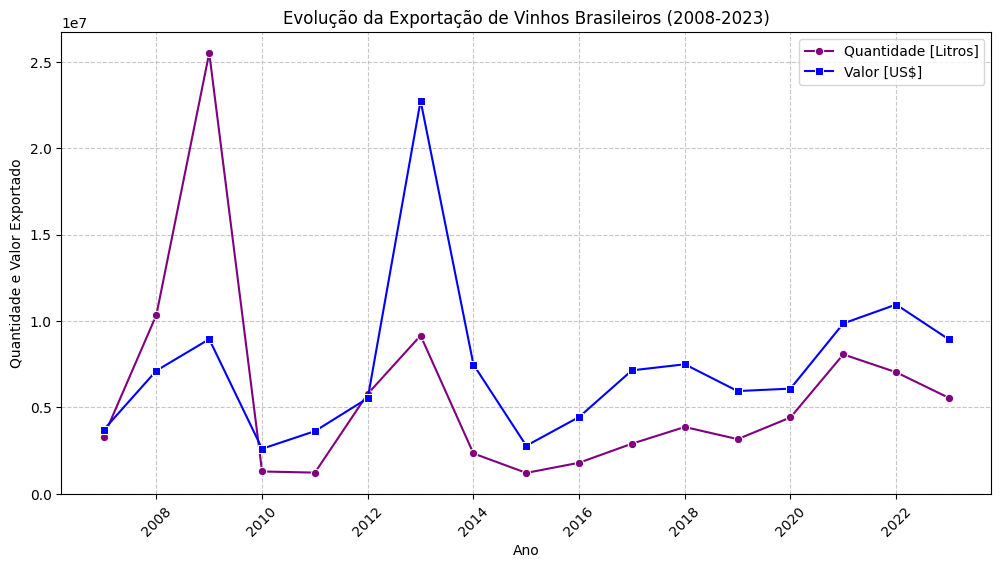

In [ ]:
dfExportacaoAno = dfExportacao.groupby(['Ano'])[['Qnt','Valor']].sum()

# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAno, x=dfExportacaoAno.index, y='Qnt', color='purple', marker='o', label='Quantidade [Litros]')
sns.lineplot(data=dfExportacaoAno, x=dfExportacaoAno.index, y='Valor', color='blue', marker='s', label='Valor [US$]')

# Tickets
plt.xlabel("Ano")
plt.ylabel("Quantidade e Valor Exportado")
plt.title("Evolução da Exportação de Vinhos Brasileiros (2008-2023)")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Ao observar as curvas de quantidade e valor, é possivel notar uma tendencia de crescimento para a exportação de vinhos.



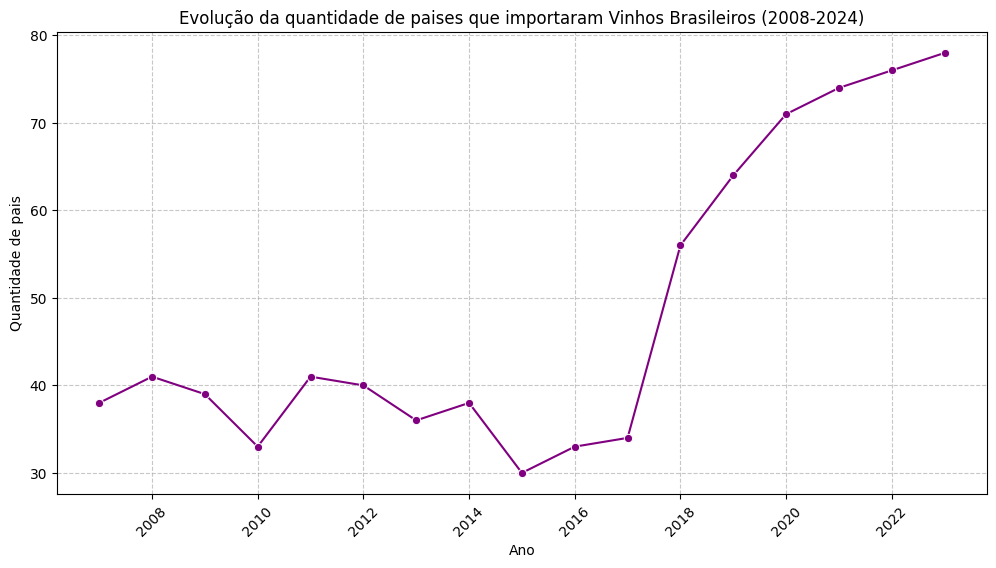

In [ ]:
dfExportacaoAnoMercado = dfExportacao.groupby(['Ano'])['Pais_Destino'].count().reset_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAnoMercado, x='Ano', y='Pais_Destino', color='purple', marker='o')

# Tickets
plt.xlabel("Ano")
plt.ylabel("Quantidade de pais")
plt.title("Evolução da quantidade de paises que importaram Vinhos Brasileiros (2008-2024)")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Além do crescimento na quantidade de exportação e vendas, é possivel notar o crescimento no numero de pais que importam o vinho do brasil. Dando um destaque para o periodo de 2018 em diante

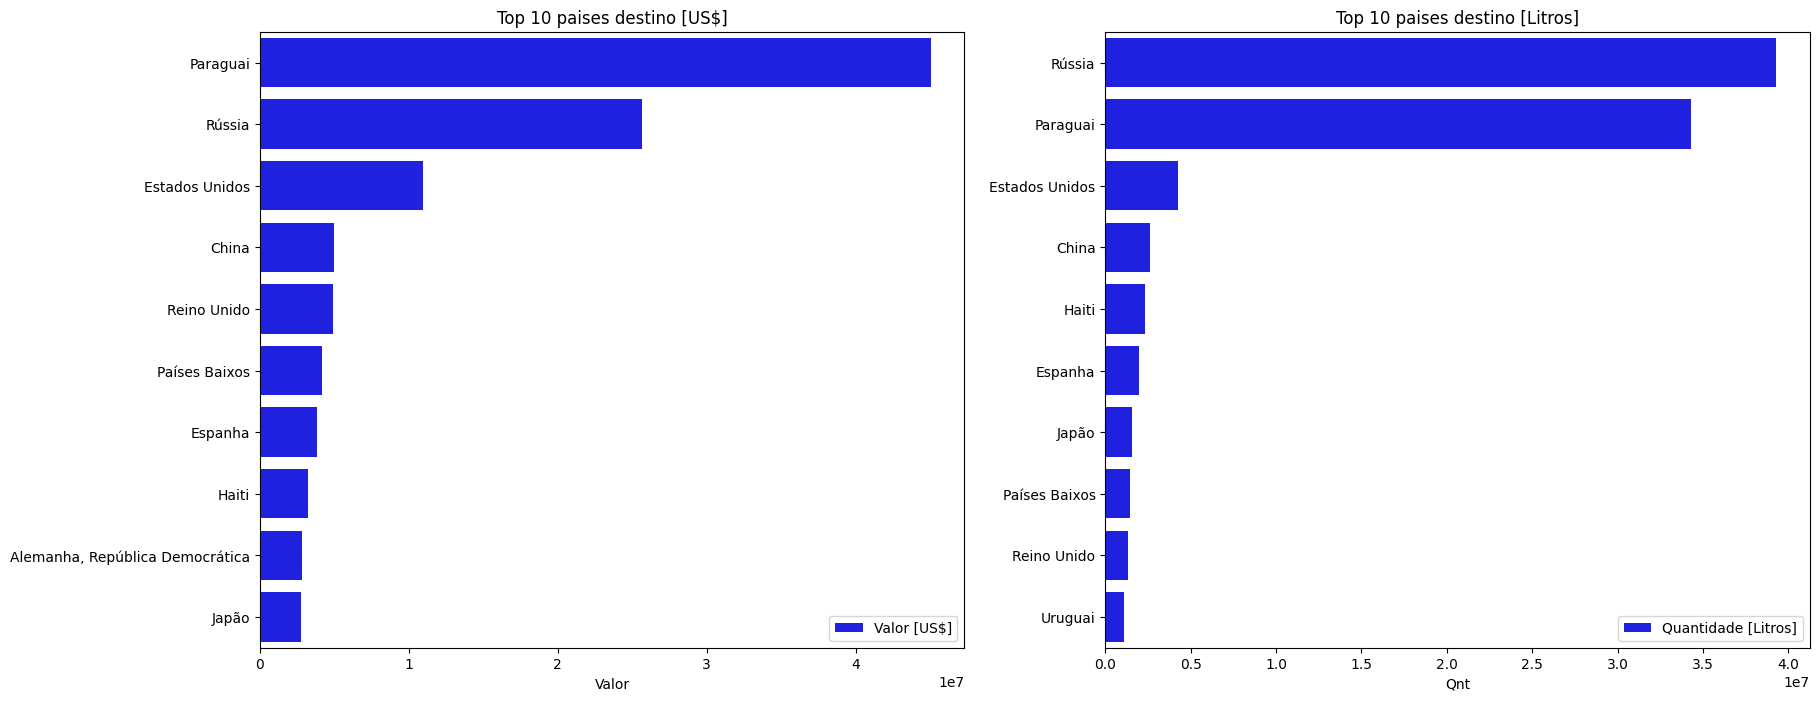

In [ ]:
#Agrupamento por qnt
dfExportacaoPais = dfExportacao.groupby(['Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

dfExportacaoPaisQnt = dfExportacaoPais.sort_values(by='Qnt', ascending=False)

dfExportacaoPaisValor = dfExportacaoPais.sort_values(by='Valor', ascending=False)


fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 linha, 2 colunas

sns.barplot(data=dfExportacaoPaisValor.head(10), x= 'Valor', y= 'Pais_Destino', color = 'blue', label='Valor [US$]', ax=axs[0])
axs[0].set_title('Top 10 paises destino [US$]')
axs[0].set_ylabel('')

sns.barplot(data=dfExportacaoPaisQnt.head(10), x= 'Qnt', y= 'Pais_Destino', color = 'blue', label='Quantidade [Litros]', ax=axs[1])
axs[1].set_title('Top 10 paises destino [Litros]')
axs[1].set_ylabel('')

plt.show()

In [ ]:
#Calculo da representatividade
QntTotal = dfExportacaoPaisQnt['Qnt'].sum()
dfExportacaoPaisQnt['Qnt Representatividade [%]'] = (dfExportacaoPaisQnt['Qnt']/QntTotal) * 100
dfExportacaoPaisQnt = dfExportacaoPaisQnt.sort_values(by = 'Qnt', ascending = False)

dfExportacaoPaisQnt = dfExportacaoPaisQnt[['Pais_Destino','Qnt','Qnt Representatividade [%]']]
dfExportacaoPaisQnt.head(5)

,Pais_Destino,Qnt,Qnt Representatividade [%]
103,Rússia,39296199.0,40.6
94,Paraguai,34280607.0,35.4
46,Estados Unidos,4272463.0,4.4
27,China,2591013.0,2.7
60,Haiti,2351248.0,2.4


In [ ]:
#Calculo da representatividade
ValorTotal = dfExportacao['Valor'].sum()
dfExportacaoPaisValor['Valor Representatividade [%]'] = (dfExportacaoPaisValor['Valor']/ValorTotal) * 100
dfExportacaoPaisValor = dfExportacaoPaisValor.sort_values(by = 'Valor', ascending = False)

dfExportacaoPaisValor = dfExportacaoPaisValor[['Pais_Destino','Valor','Valor Representatividade [%]']]
dfExportacaoPaisValor.head(5)

,Pais_Destino,Valor,Valor Representatividade [%]
94,Paraguai,45037813.0,36.0
103,Rússia,25677644.0,20.5
46,Estados Unidos,10923696.0,8.7
27,China,4960011.0,4.0
101,Reino Unido,4940255.0,3.9


In [ ]:
dfExportacaoPaisValor = dfExportacaoPaisValor.merge(dfExportacaoPaisQnt, left_on='Pais_Destino', right_on='Pais_Destino', how='left')

dfExportacaoPaisValor = dfExportacaoPaisValor.sort_values(by = 'Valor Representatividade [%]', ascending = False)

dfExportacaoPaisValor.head(2)

,Pais_Destino,Valor,Valor Representatividade [%],Qnt,Qnt Representatividade [%]
0,Paraguai,45037813.0,36.0,34280607.0,35.4
1,Rússia,25677644.0,20.5,39296199.0,40.6


Entre 2007 a 2023, apenas dois paises representaram  **76,6%** do volume de exportação: **Rússia (39,5%) e Paraguai (37,1%)**. Entrentanto, os mesmos representaram apenas **57,5%** do valor de vendas: **Rússia (19,6%) e Paraguai (37,9%)**.

#### Analise da vendas anuais da Russia e Paraguai

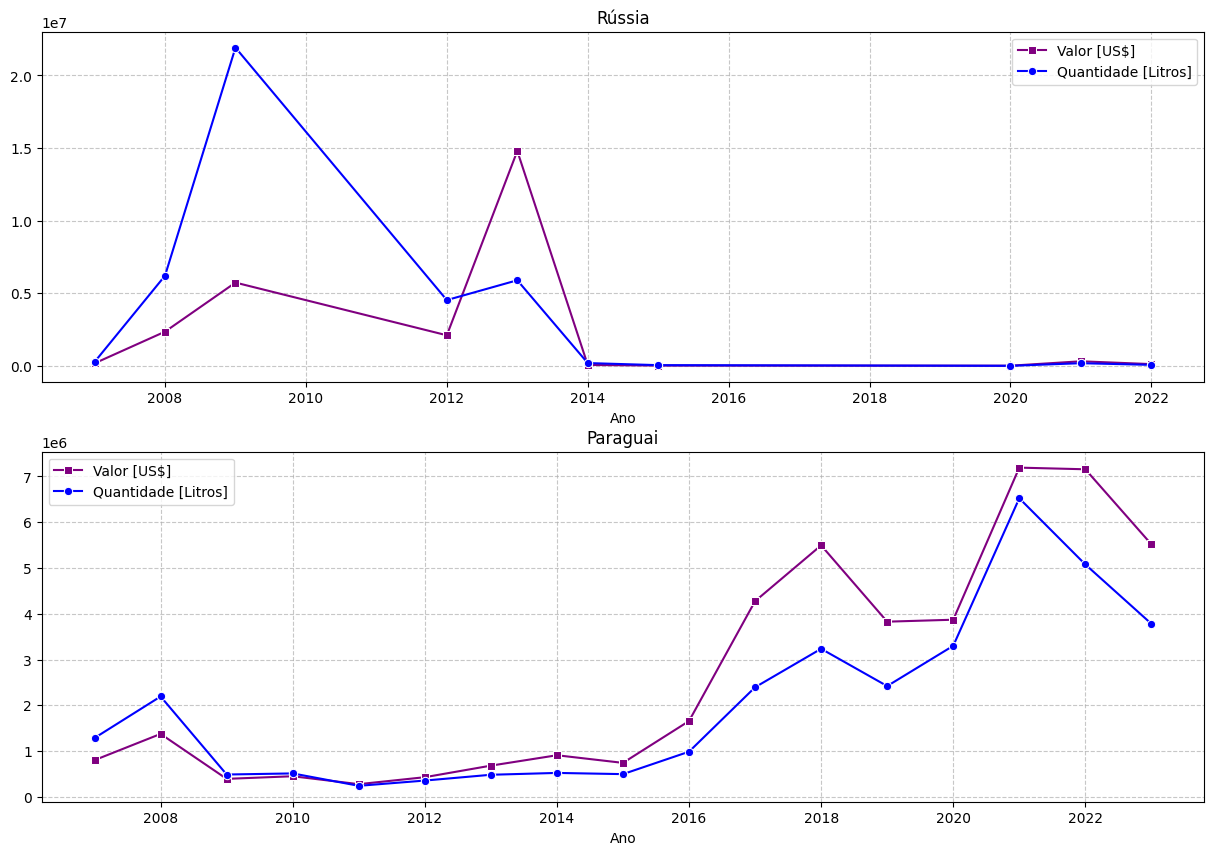

In [ ]:
# Filtro para selecionar somente Rússia e o Paraguai
dfRussia_Paraguai = dfExportacao[(dfExportacao['Pais_Destino'] == 'Rússia') | (dfExportacao['Pais_Destino'] == 'Paraguai') ]

dfRussia_Paraguai = dfRussia_Paraguai.groupby(['Ano','Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

fig, axs = plt.subplots(2, 1, figsize=(15, 10))  # 1 linha, 2 colunas

sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Rússia'], x='Ano',y='Valor', ax = axs[0], color = 'Purple',label='Valor [US$]',marker='s')
sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Rússia'], x='Ano',y='Qnt', ax = axs[0], color = 'Blue',label='Quantidade [Litros]',marker='o')
axs[0].set_title('Rússia')
axs[0].set_ylabel('')
axs[0].grid(linestyle ='--', alpha = 0.7)


sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Paraguai'], x='Ano',y='Valor', ax = axs[1], color = 'Purple',label='Valor [US$]',marker='s')
sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Paraguai'], x='Ano',y='Qnt', ax = axs[1], color = 'Blue',label='Quantidade [Litros]',marker='o')
axs[1].set_title('Paraguai')
axs[1].set_ylabel('')
axs[1].grid(linestyle ='--', alpha = 0.7)


plt.show()

In [ ]:
dfRussia = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Rússia']

dfRussia = dfRussia.groupby(['Ano'])[['Qnt','Valor']].sum().reset_index()

dfRussia = dfRussia.sort_values(by = 'Ano', ascending = True)

dfRussia

,Ano,Qnt,Valor
0,2007,266400.0,173160.0
1,2008,6207658.0,2352768.0
2,2009,21912914.0,5732280.0
3,2012,4528176.0,2103968.0
4,2013,5893291.0,14795694.0
5,2014,190656.0,61440.0
6,2015,47664.0,18240.0
7,2020,1463.0,8550.0
8,2021,181931.0,312926.0
9,2022,66046.0,118618.0


Ao observar os graficos, é possivel notar que apesar da Rússia teve uma queda nas importações de vinho apartir do periodo de 2014.

Durante esse periodo, é possivel notar que a Russia passou a produzir uvas no proprio terriotoria, diminuindo a dependencia da importação de terceiros:

https://www.ivv.gov.pt/np4/695/%7B$clientServletPath%7D/?newsId=8300&fileName=Ficha_Mercado_Russia_2017_vs2.pdf

Em contrapartida, o Paraguia apresenta-se como um pais que começou a importar apartir do periodo de 2016.

#### Analisando as bases sem a Rússia e o Paraguai

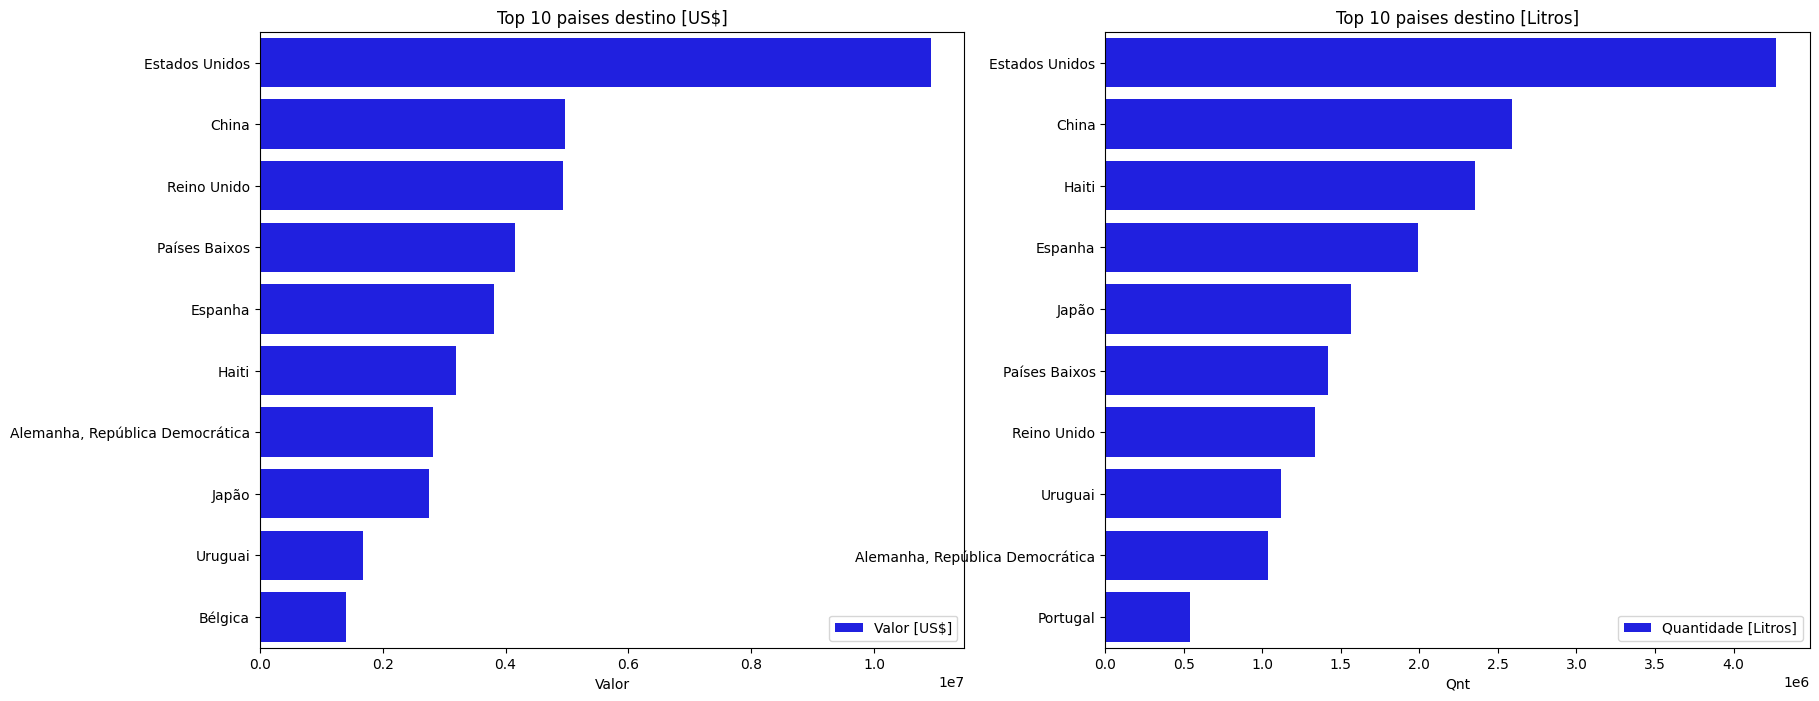

In [ ]:
#Agrupamento por qnt
dfExportacaoPais = dfExportacao.groupby(['Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

dfExportacaoPais = dfExportacaoPais[(dfExportacaoPais['Pais_Destino'] != 'Rússia') & (dfExportacaoPais['Pais_Destino'] != 'Paraguai')]

dfExportacaoPaisQnt = dfExportacaoPais.sort_values(by='Qnt', ascending=False)

dfExportacaoPaisValor = dfExportacaoPais.sort_values(by='Valor', ascending=False)


fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 linha, 2 colunas

sns.barplot(data=dfExportacaoPaisValor.head(10), x= 'Valor', y= 'Pais_Destino', color = 'blue', label='Valor [US$]', ax=axs[0])
axs[0].set_title('Top 10 paises destino [US$]')
axs[0].set_ylabel('')

sns.barplot(data=dfExportacaoPaisQnt.head(10), x= 'Qnt', y= 'Pais_Destino', color = 'blue', label='Quantidade [Litros]', ax=axs[1])
axs[1].set_title('Top 10 paises destino [Litros]')
axs[1].set_ylabel('')

plt.show()

In [ ]:
#Calculo da representatividade
QntTotal = dfExportacaoPaisQnt['Qnt'].sum()
dfExportacaoPaisQnt['Representatividade [%]'] = (dfExportacaoPaisQnt['Qnt']/QntTotal) * 100
dfExportacaoPaisQnt = dfExportacaoPaisQnt.sort_values(by = 'Qnt', ascending = False)

dfExportacaoPaisQnt = dfExportacaoPaisQnt[['Pais_Destino','Qnt','Representatividade [%]']]
dfExportacaoPaisQnt.head(5)

,Pais_Destino,Qnt,Representatividade [%]
46,Estados Unidos,4272463.0,18.4
27,China,2591013.0,11.2
60,Haiti,2351248.0,10.1
45,Espanha,1993180.0,8.6
70,Japão,1562577.0,6.7


In [ ]:
#Calculo da representatividade
QntTotal = dfExportacao['Valor'].sum()
dfExportacaoPaisValor['Representatividade [%]'] = (dfExportacaoPaisValor['Valor']/QntTotal) * 100
dfExportacaoPaisValor = dfExportacaoPaisValor.sort_values(by = 'Valor', ascending = False)

dfExportacaoPaisValor = dfExportacaoPaisValor[['Pais_Destino','Valor','Representatividade [%]']]
dfExportacaoPaisValor.head(5)

,Pais_Destino,Valor,Representatividade [%]
46,Estados Unidos,10923696.0,8.7
27,China,4960011.0,4.0
101,Reino Unido,4940255.0,3.9
95,Países Baixos,4161320.0,3.3
45,Espanha,3812723.0,3.0


In [ ]:
#Calculando os top 5 paises que mais exportaram nos ultimos 5 anos
dfExportacaoAnoPaisQnt = dfExportacao[(dfExportacao['Ano'] >= 2019) & (dfExportacao['Ano'] <= 2024) & (dfExportacao['Pais_Destino'] != 'Rússia') & (dfExportacao['Pais_Destino'] != 'Paraguai')]

dfExportacaoAnoPaisQnt = dfExportacaoAnoPaisQnt.groupby(['Ano','Pais_Destino'])[['Qnt']].sum().reset_index()

# Somando a quantidade total exportada por país no período
top_paises_qnt = dfExportacaoAnoPaisQnt.groupby('Pais_Destino')['Qnt'].sum().nlargest(6).index

# Filtrando apenas os top 5 países
dfExportacaoAnoPaisQnt = dfExportacaoAnoPaisQnt[dfExportacaoAnoPaisQnt['Pais_Destino'].isin(top_paises_qnt)]

print(top_paises_qnt)
dfExportacaoAnoPaisQnt.head(5)


Index(['Haiti', 'Uruguai', 'Estados Unidos', 'China', 'Venezuela', 'Curaçao'], dtype='object', name='Pais_Destino')


,Ano,Pais_Destino,Qnt
12,2019,China,129852.0
17,2019,Curaçao,33951.0
22,2019,Estados Unidos,209765.0
30,2019,Haiti,81873.0
60,2019,Uruguai,6180.0


#### Analise por ano

In [ ]:
#Calculando os top 5 paises que mais exportaram nos ultimos 5 anos
dfExportacaoAnoPaisValor = dfExportacao[(dfExportacao['Ano'] >= 2019) & (dfExportacao['Ano'] <= 2024)& (dfExportacao['Pais_Destino'] != 'Rússia') & (dfExportacao['Pais_Destino'] != 'Paraguai')]

dfExportacaoAnoPaisValor = dfExportacaoAnoPaisValor.groupby(['Ano','Pais_Destino'])[['Valor']].sum().reset_index()

# Somando a quantidade total exportada por país no período
top_paises_valor = dfExportacaoAnoPaisValor.groupby('Pais_Destino')['Valor'].sum().nlargest(10).index

# Filtrando apenas os top 5 países
dfExportacaoAnoPaisValor = dfExportacaoAnoPaisValor[dfExportacaoAnoPaisValor['Pais_Destino'].isin(top_paises_valor)]

print(top_paises_valor)
dfExportacaoAnoPaisValor.head(10)

Index(['Haiti', 'Estados Unidos', 'Uruguai', 'China', 'Reino Unido', 'Japão',
       'Venezuela', 'Curaçao', 'Nigéria', 'Hong Kong'],
      dtype='object', name='Pais_Destino')


,Ano,Pais_Destino,Valor
12,2019,China,376828.0
17,2019,Curaçao,62067.0
22,2019,Estados Unidos,616274.0
30,2019,Haiti,129803.0
31,2019,Hong Kong,42020.0
35,2019,Japão,99642.0
43,2019,Nigéria,38555.0
51,2019,Reino Unido,164592.0
60,2019,Uruguai,18497.0
77,2020,China,363000.0


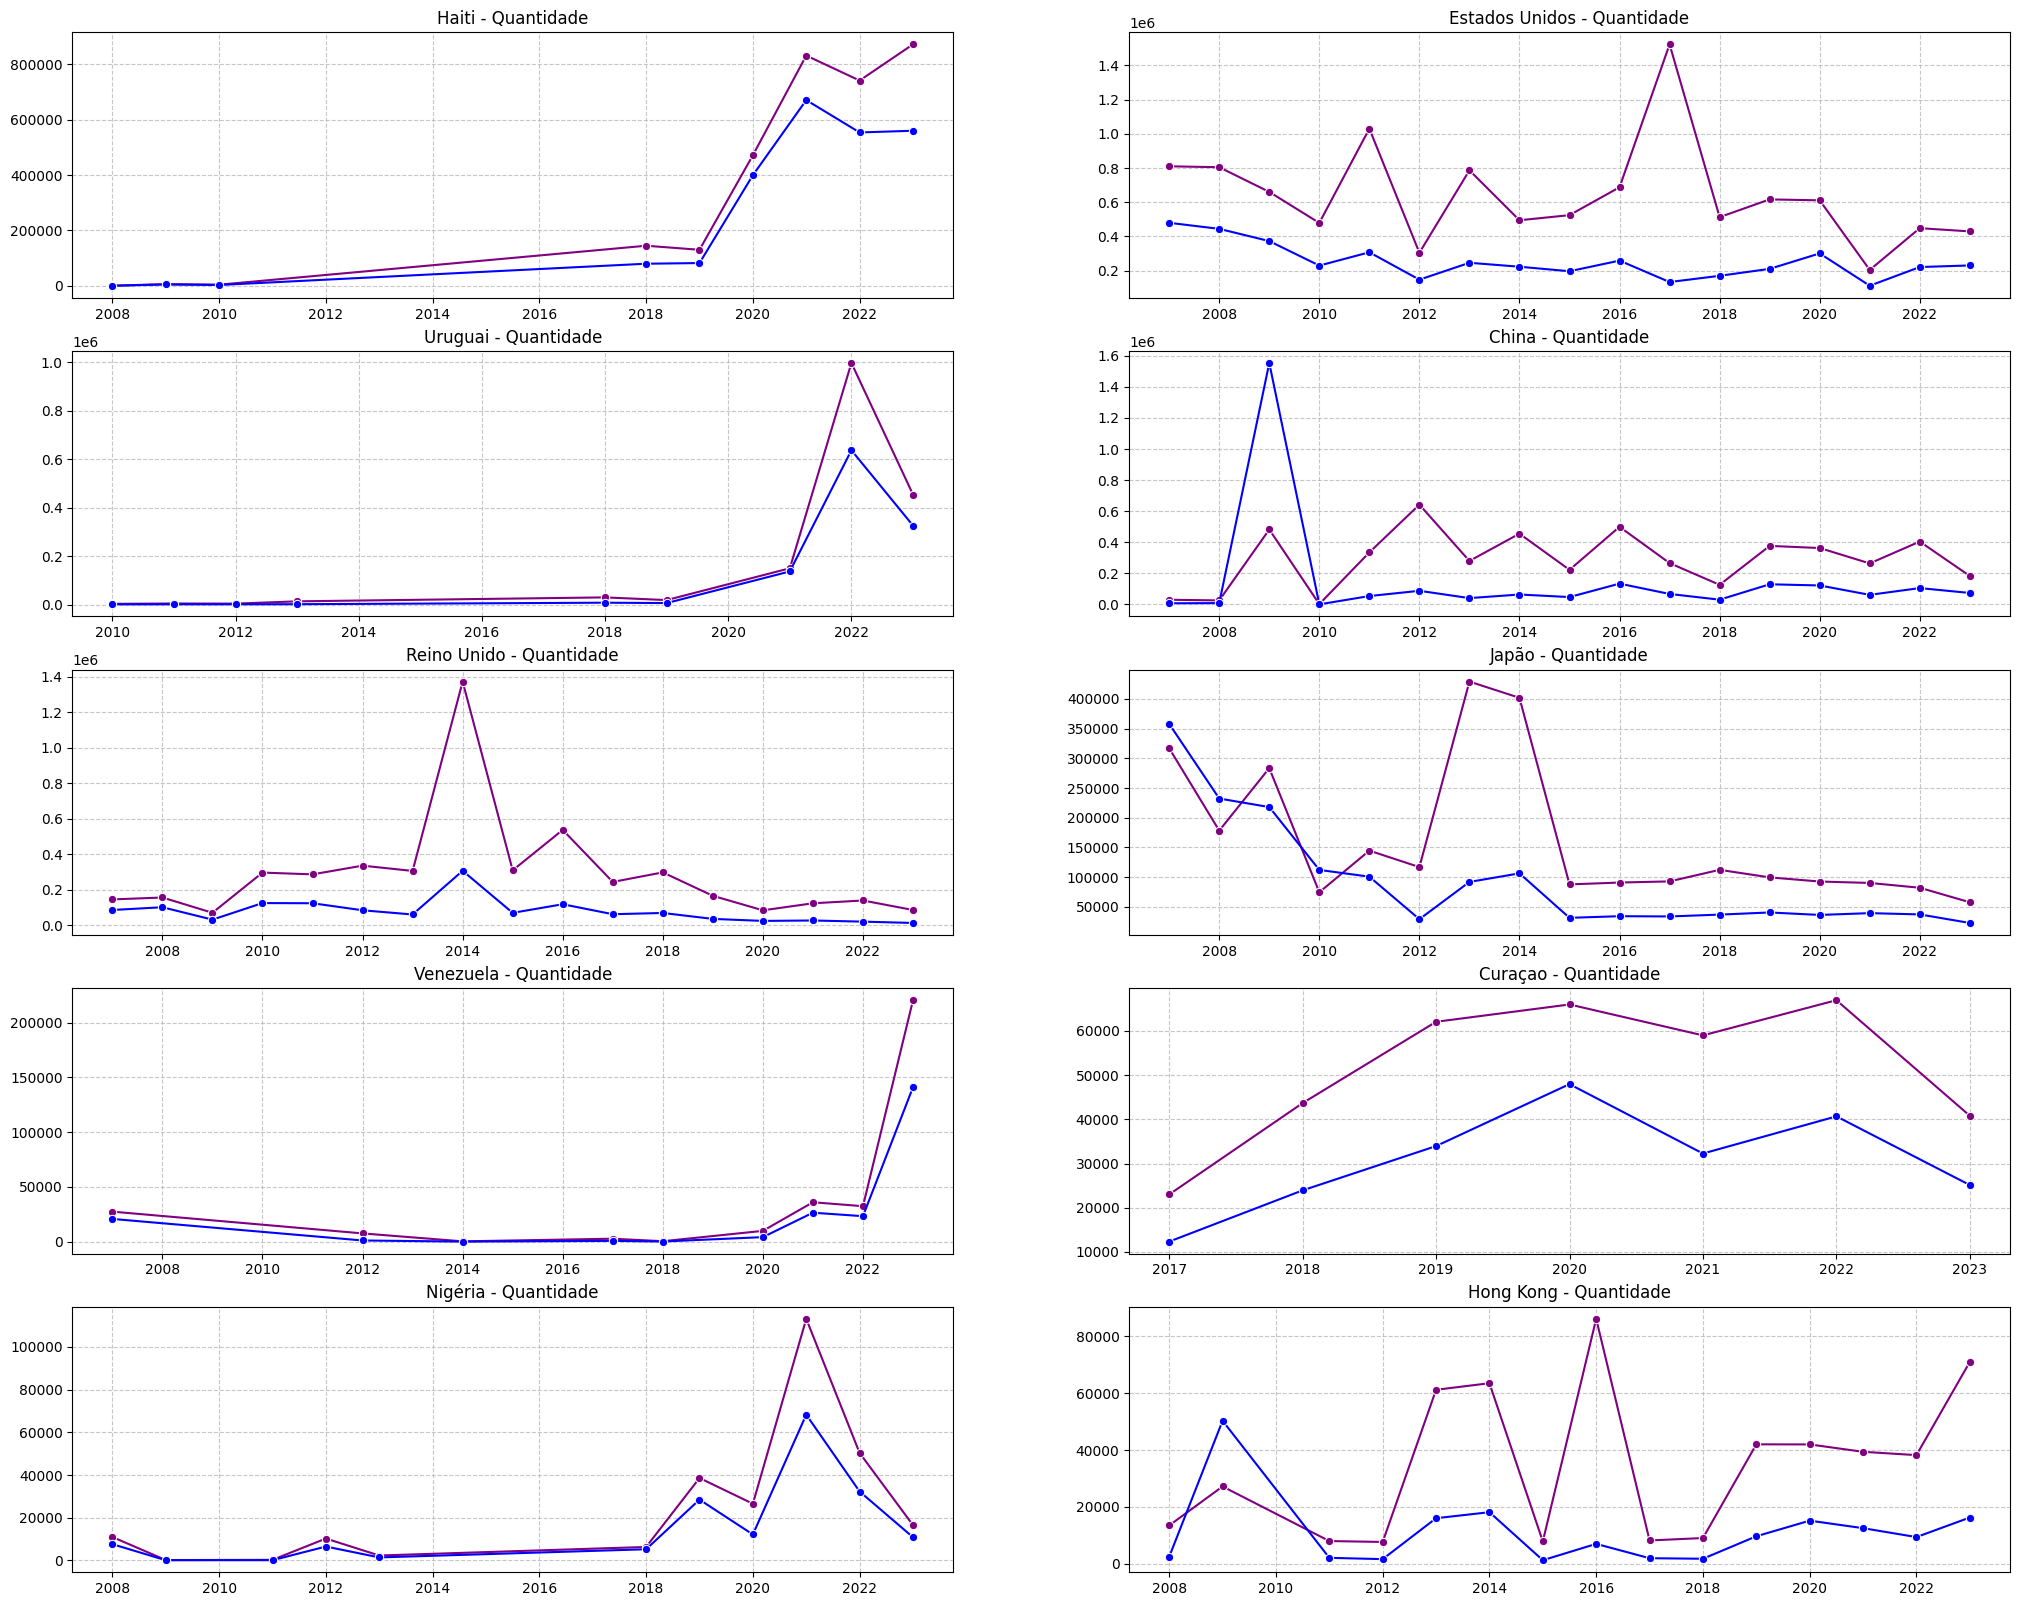

In [ ]:
dfExportacaoAnoPaisValor = dfExportacao[dfExportacao['Pais_Destino'].isin(top_paises_valor)]

# Criando figura e eixos
fig, axs = plt.subplots(5,2, figsize=(25, 20))
axs = axs.flatten()  # Transforma em lista para facilitar iteração

# Gráficos de Quantidade por país
for i, pais in enumerate(top_paises_valor):

    sns.lineplot(data=dfExportacaoAnoPaisValor[dfExportacaoAnoPaisValor['Pais_Destino'] == pais],
                 x='Ano', y='Valor', marker='o', ax=axs[i], color = 'purple')

    sns.lineplot(data=dfExportacaoAnoPaisValor[dfExportacaoAnoPaisValor['Pais_Destino'] == pais],
                 x='Ano', y='Qnt', marker='o', ax=axs[i], color = 'Blue')

    axs[i].set_title(f"{pais} - Quantidade")
    axs[i].grid(linestyle='--', alpha=0.7)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')

plt.show()

Ao observar os top 10, temos a seguintes tendecias:

- Paises com tendencia ao aumento de importações: Haiti, Uruguai, Venezuela, Curaçao, Nigéria e Hong Kong
- Paises com tendencia estabilidade: China, Reino Unido e Japão
- Paises com tendencia na diminuição no numero de importação: Estados Unidos

Dessa forma, temos que 6 dos paises que mais importaram no ultimos 5 anos apresentam uma tendencia a aumentar o numero de importações de vinho.


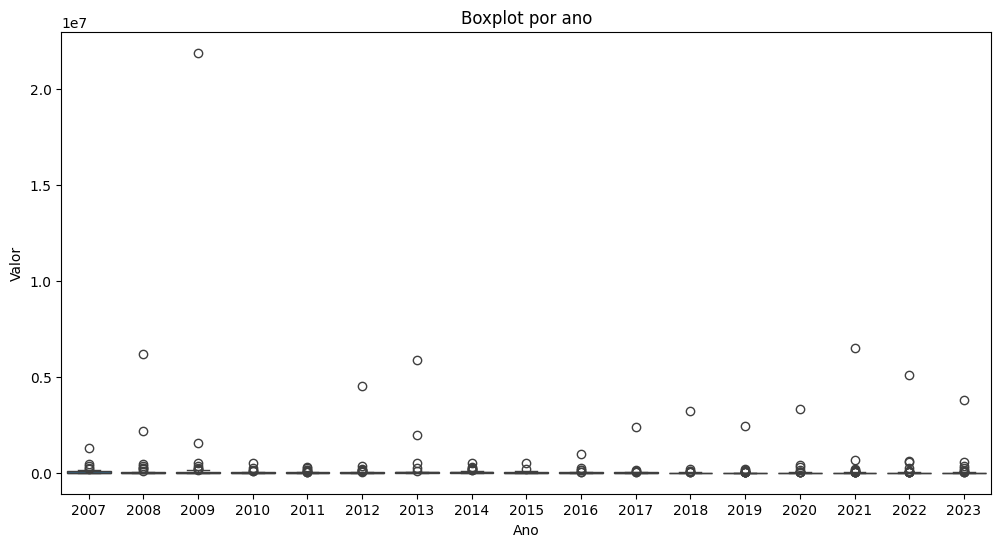

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = dfExportacao, x='Ano', y='Qnt')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Boxplot por ano')
plt.show()

Visto que todos os anos possuem uma **quantidade muito grande de outliers**, iremos realizar o comparativo da mediana, uma vez que os outliers distorcem o valor da média aritmética. Dessa forma, iremos analisar plotar apenas as curvas dos paises que apresentam valores maiores que as medianos dos seus anos.

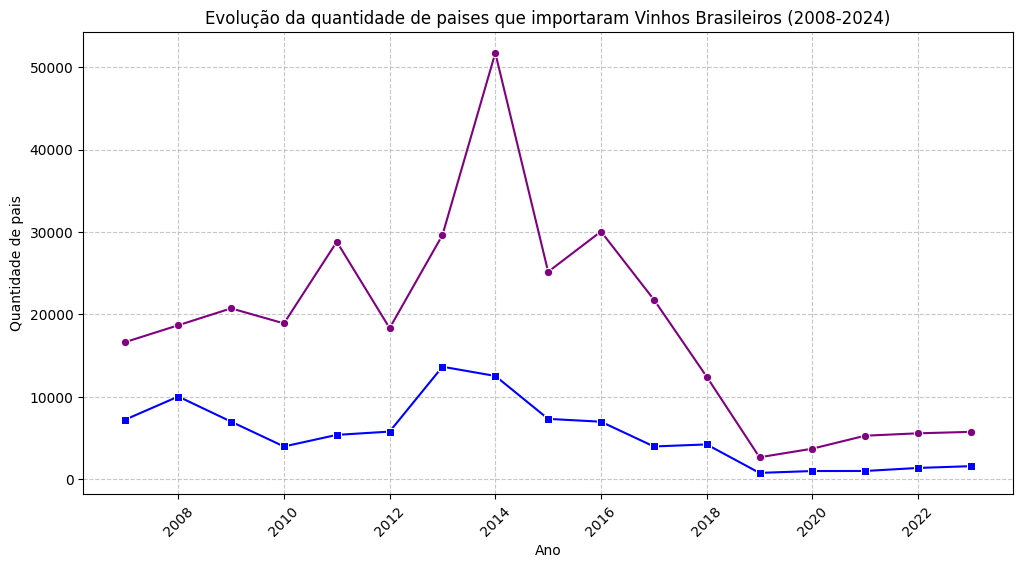

In [ ]:
#Calculo da Mediana por ano
dfExportacaoAnoMediana = dfExportacao.groupby(['Ano'])[['Qnt','Valor']].median().reset_index()
dfExportacaoAnoMediana = dfExportacaoAnoMediana.rename(columns = {'Qnt':'Qnt_Mediana','Valor':'Valor_Mediana'})


# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAnoMediana, x='Ano', y='Valor_Mediana', color='purple', marker='o')
sns.lineplot(data=dfExportacaoAnoMediana, x='Ano', y='Qnt_Mediana', color='Blue', marker='s')


# Tickets
plt.xlabel("Ano")
plt.ylabel("Quantidade de pais")
plt.title("Evolução da quantidade de paises que importaram Vinhos Brasileiros (2008-2024)")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Agrupando por ano e pais
dfExportacaoAnoPais = dfExportacao.groupby(['Ano','Pais_Destino'])[['Qnt']].sum().reset_index()

#Pivotando os paises
dfExportacaoAnoPais = dfExportacaoAnoPais.pivot(index='Pais_Destino', columns='Ano', values='Qnt').reset_index()


dfExportacaoAnoPais

Ano,Pais_Destino,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afeganistão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN
1,"Alemanha, República Democrática",119512.0,265742.0,225086.0,27715.0,36070.0,8189.0,61699.0,213348.0,10680.0,14012.0,15467.0,10794.0,3660.0,6261.0,2698.0,7630.0,4806.0
2,Angola,25931.0,25721.0,54786.0,33557.0,13889.0,2833.0,1573.0,12182.0,1908.0,7359.0,10170.0,477.0,345.0,NaN,NaN,4068.0,NaN
3,Antilhas Holandesas,17025.0,17938.0,8235.0,9810.0,7335.0,9247.0,11281.0,4455.0,6660.0,16641.0,5400.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Antígua e Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,219.0,624.0,805.0,419.0,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN
123,Venezuela,20700.0,NaN,NaN,NaN,NaN,1029.0,NaN,14.0,NaN,NaN,680.0,71.0,NaN,4086.0,26415.0,23220.0,141030.0
124,Vietnã,NaN,NaN,743.0,8820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,86.0,NaN,130.0,72.0
125,África do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,4.0,NaN,NaN,117.0


In [ ]:
#Agrupando por ano e pais
dfExportacaoAnoPais = dfExportacao.groupby(['Ano','Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

#Removendo a Russia e o Paraguai
dfExportacaoAnoPais = dfExportacaoAnoPais[(dfExportacaoAnoPais['Pais_Destino'] != 'Rússia') & (dfExportacaoAnoPais['Pais_Destino'] != 'Paraguai')]

#Calculo da Mediana por ano
dfExportacaoAnoMediana = dfExportacao.groupby(['Ano'])[['Qnt','Valor']].median().reset_index()
dfExportacaoAnoMediana = dfExportacaoAnoMediana.rename(columns = {'Qnt':'Qnt_Mediana','Valor':'Valor_Mediana'})

#Trazendo a coluna de media para a tabela agrupada
dfExportacaoAnoPais = dfExportacaoAnoPais.merge(dfExportacaoAnoMediana, left_on='Ano', right_on='Ano', how='left')

dfExportacaoAnoPais.head(5)

,Ano,Pais_Destino,Qnt,Valor,Qnt_Mediana,Valor_Mediana
0,2007,"Alemanha, República Democrática",119512.0,238052.0,7239.5,16644.5
1,2007,Angola,25931.0,49753.0,7239.5,16644.5
2,2007,Antilhas Holandesas,17025.0,17949.0,7239.5,16644.5
3,2007,Austrália,60.0,281.0,7239.5,16644.5
4,2007,Bolívia,4985.0,3550.0,7239.5,16644.5


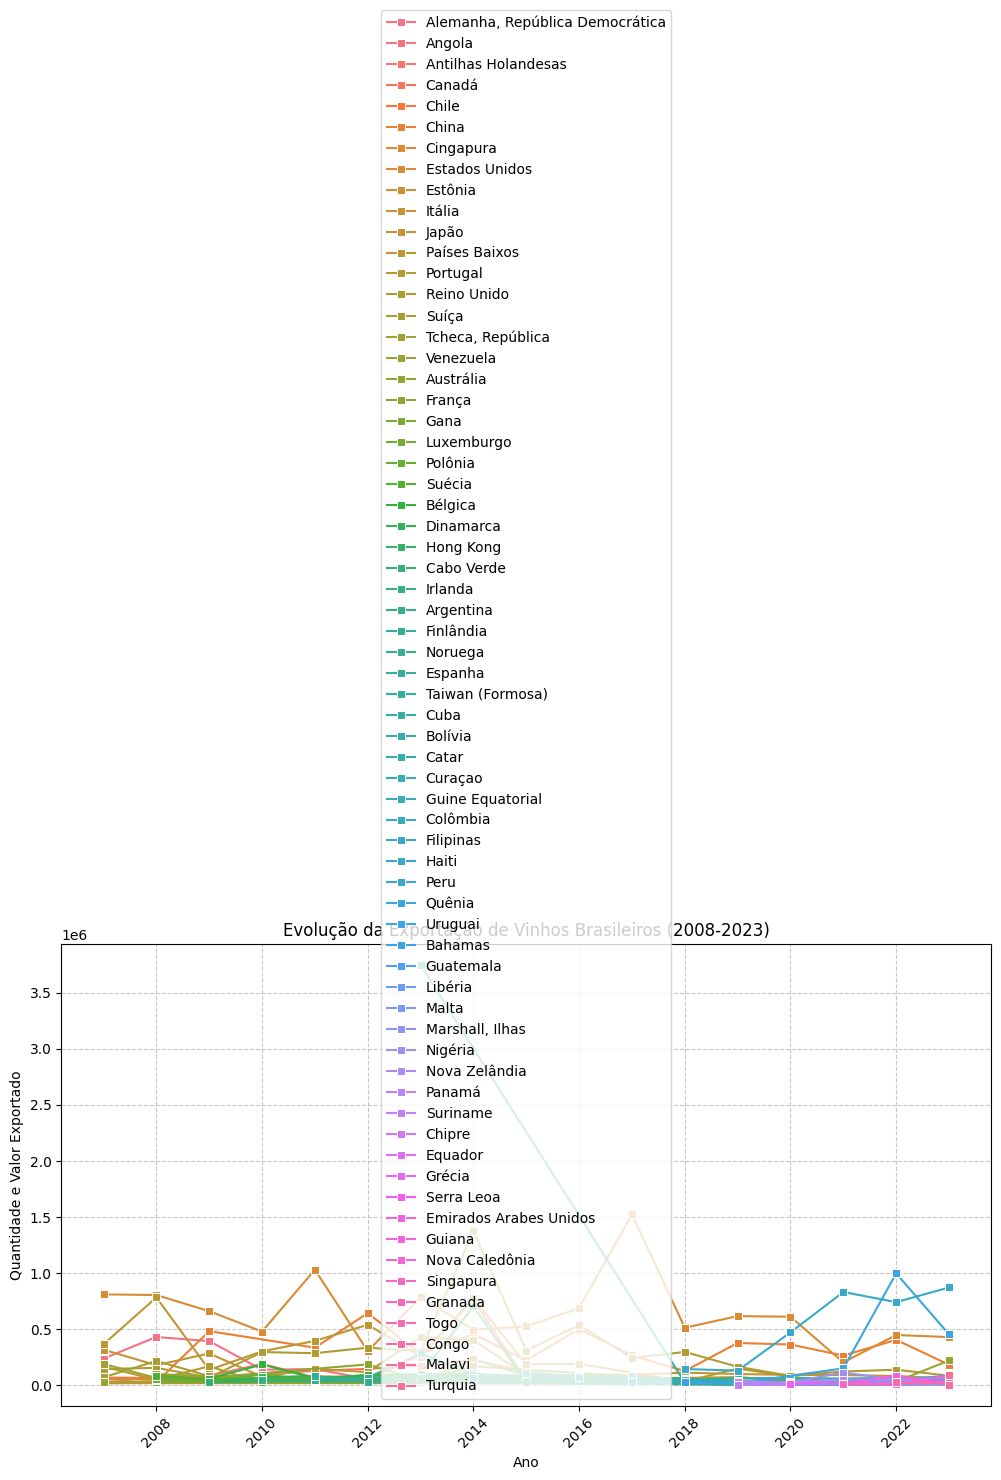

In [ ]:
dfExportacaoAnoPaisValor = dfExportacaoAnoPais[dfExportacaoAnoPais['Valor'] > dfExportacaoAnoPais['Valor_Mediana']]

# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAnoPaisValor, x='Ano', y='Valor', hue='Pais_Destino', marker='s')

# Tickets
plt.xlabel("Ano")
plt.ylabel("Quantidade e Valor Exportado")
plt.title("Evolução da Exportação de Vinhos Brasileiros (2008-2023)")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()